### IRIS Dataset for species clasification

###### Importing required Libraries

In [15]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To divide train and test set
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# To evaluate the models
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import plot_confusion_matrix,classification_report

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from sklearn.preprocessing import normalize

In [16]:
from sklearn import datasets

#### Importing data from sklearn

In [17]:
data = datasets.load_iris()

In [18]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Description of the Dataset

In [19]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
iris = pd.DataFrame(data['data'],columns=data.feature_names)
flower = pd.DataFrame(data['data'],columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
iris['species'] = pd.Series(data.target)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### Basic Summary Statistics

In [23]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [24]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

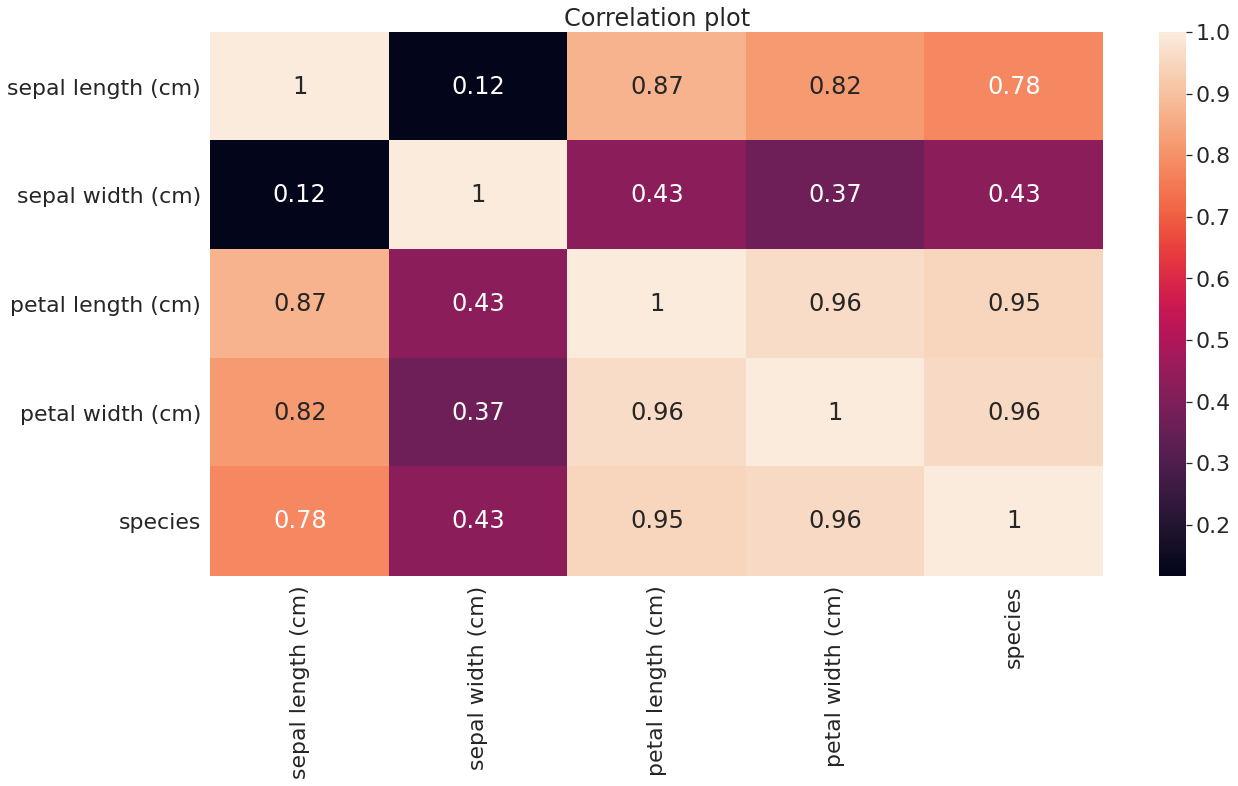

In [25]:
plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
ax = sns.heatmap(iris.corr().abs(),  annot=True);
ax.set_title("Correlation plot");

In [26]:
cols = list(iris)

In [27]:
flower = iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
req = pd.read_csv('/content/flower.csv',header=None)

In [29]:
req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Columns: 150 entries, 0 to 149
dtypes: float64(150)
memory usage: 4.8 KB


In [30]:
x_flat = req
y = np.array(iris['species'])

In [31]:
y_flat = y.reshape(y.shape[0],-1).T

In [32]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [33]:
x_norm = normalize(x_flat)
y_norm = normalize(y_flat)

In [34]:
(n_x,m) = x_flat.shape
n_y = y_flat.shape[0]

In [35]:
X = tf.placeholder(shape = [n_x,None],dtype=tf.float32)
Y = tf.placeholder(shape = [n_y,None],dtype=tf.float32)

In [36]:
tf.set_random_seed(22)

In [37]:
def initialize_parameters():
    
    W1 = tf.get_variable("W1",[3,4],initializer = tf.zeros_initializer())
    b1 = tf.get_variable("b1",[3,1],initializer = tf.zeros_initializer())

    
    parameters = {"W1":W1,
                  "b1":b1}
                  
    return parameters


In [38]:
p = initialize_parameters()

In [39]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']

    Z1 = tf.add(tf.linalg.matmul(W1,X),b1)

    return Z1

In [40]:
Z22 = forward_propagation(X,p)

In [41]:
y_softmax = tf.nn.softmax(Z22)

In [42]:
def compute_cost(Z1,Y):
    
    logits = tf.transpose(Z1)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

In [43]:
cost = compute_cost(Z22,Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.01).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [44]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) 
par = sess.run(p)
Y_pred = sess.run(Z22,feed_dict={X:x_flat})
cost_value = sess.run(cost,feed_dict={Z22:Y_pred,Y:y_flat})

In [45]:
costs =[]
for i in range(0,2000):
    _,new_cost_value = sess.run([optimizer, cost], feed_dict={X: x_flat, Y: y_flat})
    costs.append(new_cost_value)

p = sess.run(p)                     
y_softmax = sess.run(y_softmax,feed_dict={X: x_flat, Y: y_flat})

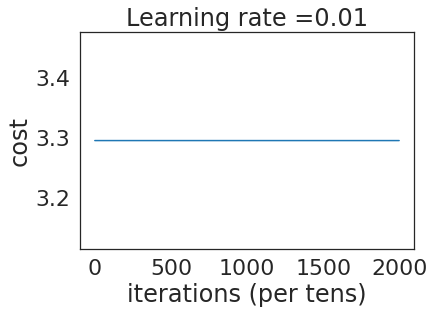

In [46]:
plt.plot(np.squeeze(costs)) 
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(.01))
plt.show() 

In [47]:
correct_prediction = tf.equal(tf.argmax(y_softmax), tf.argmax(y_flat))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("the Accuracy is :"+str(sess.run(accuracy, feed_dict={X: x_flat, Y: y_flat})))

the Accuracy is :1.0


In [48]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
x_train = iris.drop('species', axis=1)
y_train= iris['species']

### Naive Bayes Classification

In [50]:
Naive = GaussianNB()
model = Naive.fit(x_train,y_train)
y_pred = model.predict(x_train)

confusion = pd.DataFrame(confusion_matrix(y_train,y_pred),columns=['Pred_setosa','Pred_versicolor','Pred_virginica'],index=['Act_Setosa','Act_versicolor','Act_virginica'])
print("Accuracy for Train :",accuracy_score(y_train,model.predict(x_train)))
print("Confusion Matrix for Train :")
confusion

Accuracy for Train : 0.96
Confusion Matrix for Train :


,Pred_setosa,Pred_versicolor,Pred_virginica
Act_Setosa,50,0,0
Act_versicolor,0,47,3
Act_virginica,0,3,47


In [51]:
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



### Conclusion :

If we compare both the model ANN and Naïve Bayes classifiers,the precision ,recall and accuracy are 100% which indicates the it is classifying everything perfectly.Where as naïve Bayes classifys only setosa species perfectly well where as for other evaluation metrics its only 94 % , i.e there is 6% miss classification for Versicolour and Virginica species.